In [172]:
# Import necessary modules 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [173]:
# Loading data
df = pd.read_csv('./output.csv')
print(len(df))
print(df.head())

5876
   id   age  age.diag  age.menarch  age.menop  Occupation  education  marital  \
0  63  63.0      63.0         20.0       40.0         2.0        1.0      2.0   
1  64  57.0      57.0         13.0       52.0         2.0        1.0      2.0   
2  65  57.0      57.0         13.0       52.0         2.0        1.0      2.0   
3  66  29.0      28.0         15.0        0.0         2.0        1.0      2.0   
4  67  51.0      53.0         13.0       50.0         2.0        2.0      2.0   

   gravity  lactaton  ...  F.H.BC  age.family  FH.other.Ca  weight  height  \
0      1.0      48.0  ...     0.0          42          0.0    68.0   147.0   
1      2.0      48.0  ...     0.0          42          0.0    68.0   147.0   
2      2.0      48.0  ...     0.0          42          0.0    68.0   147.0   
3      1.0      48.0  ...     0.0          42          0.0    65.0   155.0   
4      1.0      96.0  ...     3.0          42          0.0    80.0   162.0   

   MTZ1  date.MTZ.1  MTZ.2  MTZ.2.date 

# Split into training and test set

In [174]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.01)

In [175]:
df.head()

,id,age,age.diag,age.menarch,age.menop,Occupation,education,marital,gravity,lactaton,...,F.H.BC,age.family,FH.other.Ca,weight,height,MTZ1,date.MTZ.1,MTZ.2,MTZ.2.date,L.recurrence
0,63,63.0,63.0,20.0,40.0,2.0,1.0,2.0,1.0,48.0,...,0.0,42,0.0,68.0,147.0,0.0,#NULL!,2.0,#NULL!,18.08.78
1,64,57.0,57.0,13.0,52.0,2.0,1.0,2.0,2.0,48.0,...,0.0,42,0.0,68.0,147.0,0.0,#NULL!,2.0,#NULL!,18.08.78
2,65,57.0,57.0,13.0,52.0,2.0,1.0,2.0,2.0,48.0,...,0.0,42,0.0,68.0,147.0,0.0,#NULL!,2.0,#NULL!,18.08.78
3,66,29.0,28.0,15.0,0.0,2.0,1.0,2.0,1.0,48.0,...,0.0,42,0.0,65.0,155.0,0.0,#NULL!,2.0,#NULL!,18.08.78
4,67,51.0,53.0,13.0,50.0,2.0,2.0,2.0,1.0,96.0,...,3.0,42,0.0,80.0,162.0,0.0,#NULL!,2.0,#NULL!,18.08.78


In [176]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [177]:
y_pred = knn_model.predict(X_test)

In [178]:
y_predict = knn_model.predict(X_test)
y_train_predict = knn_model.predict(X_train)
print('train accuracy:',accuracy_score(y_train, y_train_predict))
print('test accuracy:',accuracy_score(y_test, y_predict))

train accuracy: 0.8904933814681107
test accuracy: 0.8135593220338984


In [179]:
f1 = f1_score(y_test, y_predict, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.7755


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.86      0.94      0.90        51
        11.0       0.00      0.00      0.00         1

    accuracy                           0.81        59
   macro avg       0.29      0.31      0.30        59
weighted avg       0.74      0.81      0.78        59



c:\Users\IraniaN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IraniaN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IraniaN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [181]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[ 0  7  0]
 [ 3 48  0]
 [ 0  1  0]]


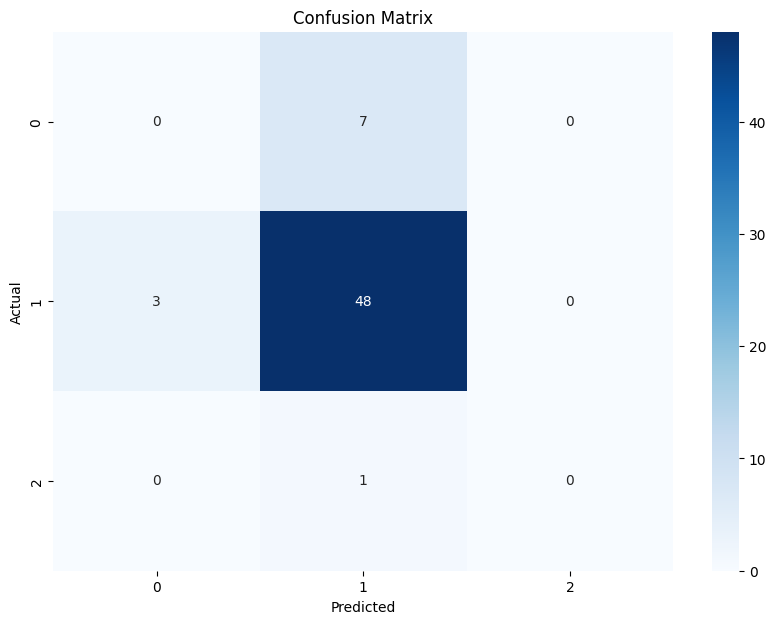

In [182]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()